# Using ClusterFile

In [1]:
from pathlib import Path
import numpy as np 
import matplotlib.pyplot as plt
import boost_histogram as bh
import time

#Python cluster reader
from creader import ClusterFile
path = Path('/mnt/sls_det_storage/moench_data/cluster_reader_test/')

## Read clusters from file and plot a histogram

- Passing chunk, to the cluster reader to set the default amount of clusters to be read
- Using the context manager to manage the file closing
- Looping over chunks in the file (reads chunksize until a zero read)

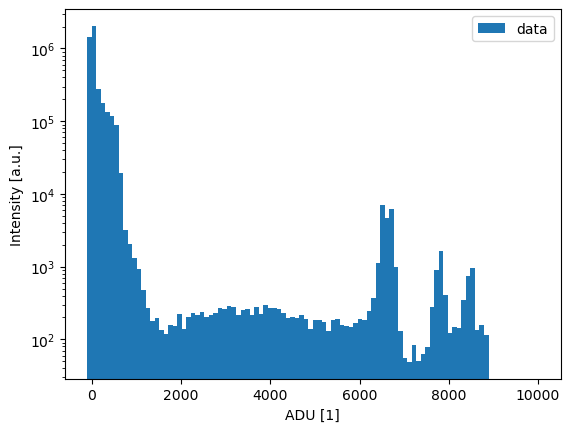

In [6]:
fname = 'beam_En700eV_-40deg_300V_10us_d0_f0_100.clust'

# Create the histogram
n_bins = 100
xmin = -100
xmax = 1e4
hist1 = bh.Histogram(bh.axis.Regular(n_bins, xmin, xmax))

# Read clusters and fill the histogram with pixel values
with ClusterFile(path/fname, chunk = 10000) as f:
    for clusters in f:
        hist1.fill(clusters['data'].flat)


#Plotting
fig, ax = plt.subplots()
ax.bar(hist1.axes[0].centers, hist1.values(), width=hist1.axes[0].widths, label = 'data')
ax.set_yscale('log')
ax.set_xlabel('ADU [1]')
ax.set_ylabel('Intensity [a.u.]')
ax.legend()